In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


 <img
      src="https://popupsmart.com/encyclopedia/images/e/m/a/i/l/email-marketing-spam-folder-88fcca5f.jpg"
      width="1000"
      alt="Spam"
    />

# Table of content
1. importing dataset
1. EDA
1. Data preprocessing
1. Model Building
1. Accuracy score

## Importing dataset

In [24]:
df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [25]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [26]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [27]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.shape

(5572, 2)

In [29]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [30]:
for i in range(0,5572):
    if df['v1'][i]=="spam":
        df['v1'][i]=1
    else:
        df['v1'][i]=0

In [31]:
df['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: object

In [32]:
df.v1.value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [33]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [34]:
df.sample(10)

,target,text
507,0,You should know now. So how's anthony. Are you...
3714,0,"I am late,so call you tomorrow morning.take ca..."
2932,0,Yo do you know anyone &lt;#&gt; or otherwise...
3765,0,Yes.mum lookin strong:)
1622,1,U have a secret admirer who is looking 2 make ...
4773,0,U repeat e instructions again. Wat's e road na...
1236,0,How much are we getting?
906,1,"all the lastest from Stereophonics, Marley, Di..."
1234,0,\Hello-/@drivby-:0quit edrunk sorry iff pthis ...
3557,0,No da. . Vijay going to talk in jaya tv


In [35]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [36]:
df.duplicated().sum()

403

In [37]:
df=df.drop_duplicates(keep='first')

In [38]:
df.duplicated().sum()

0

In [39]:
df.shape

(5169, 2)

# 2. EDA

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

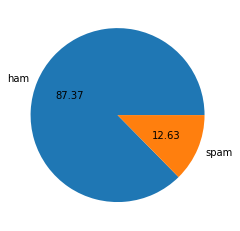

In [46]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

## **Data is imbalanced**

In [47]:
import nltk

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
df['num_char']=df['text'].apply(len)

In [51]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [57]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [58]:
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [59]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [60]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [62]:
df.describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [63]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

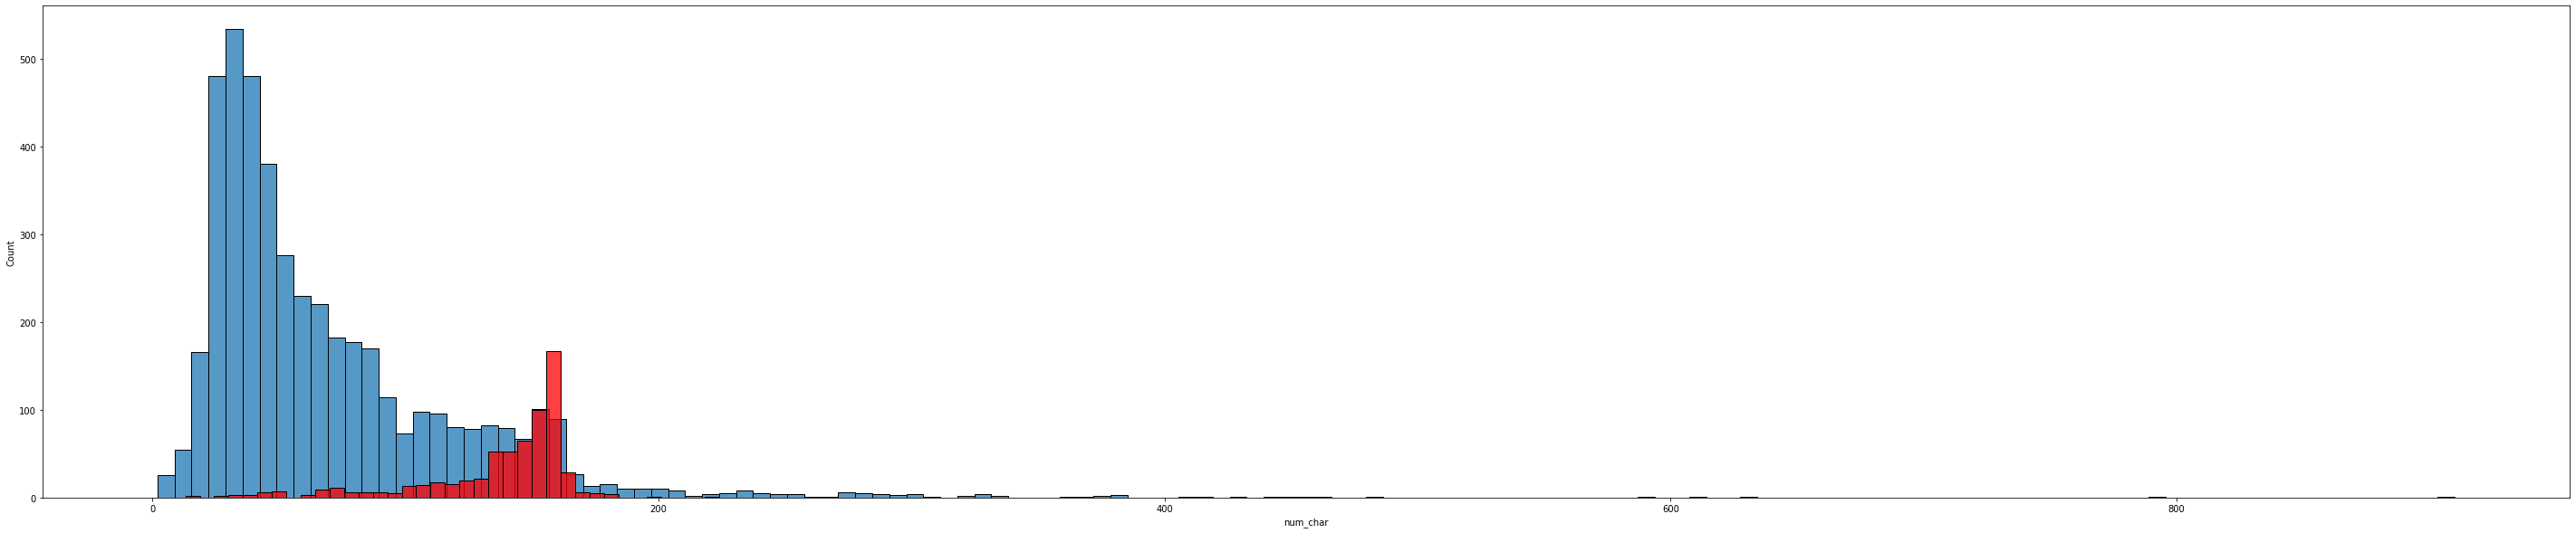

In [73]:
plt.figure(figsize=(50,10))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')


<AxesSubplot:xlabel='num_word', ylabel='Count'>

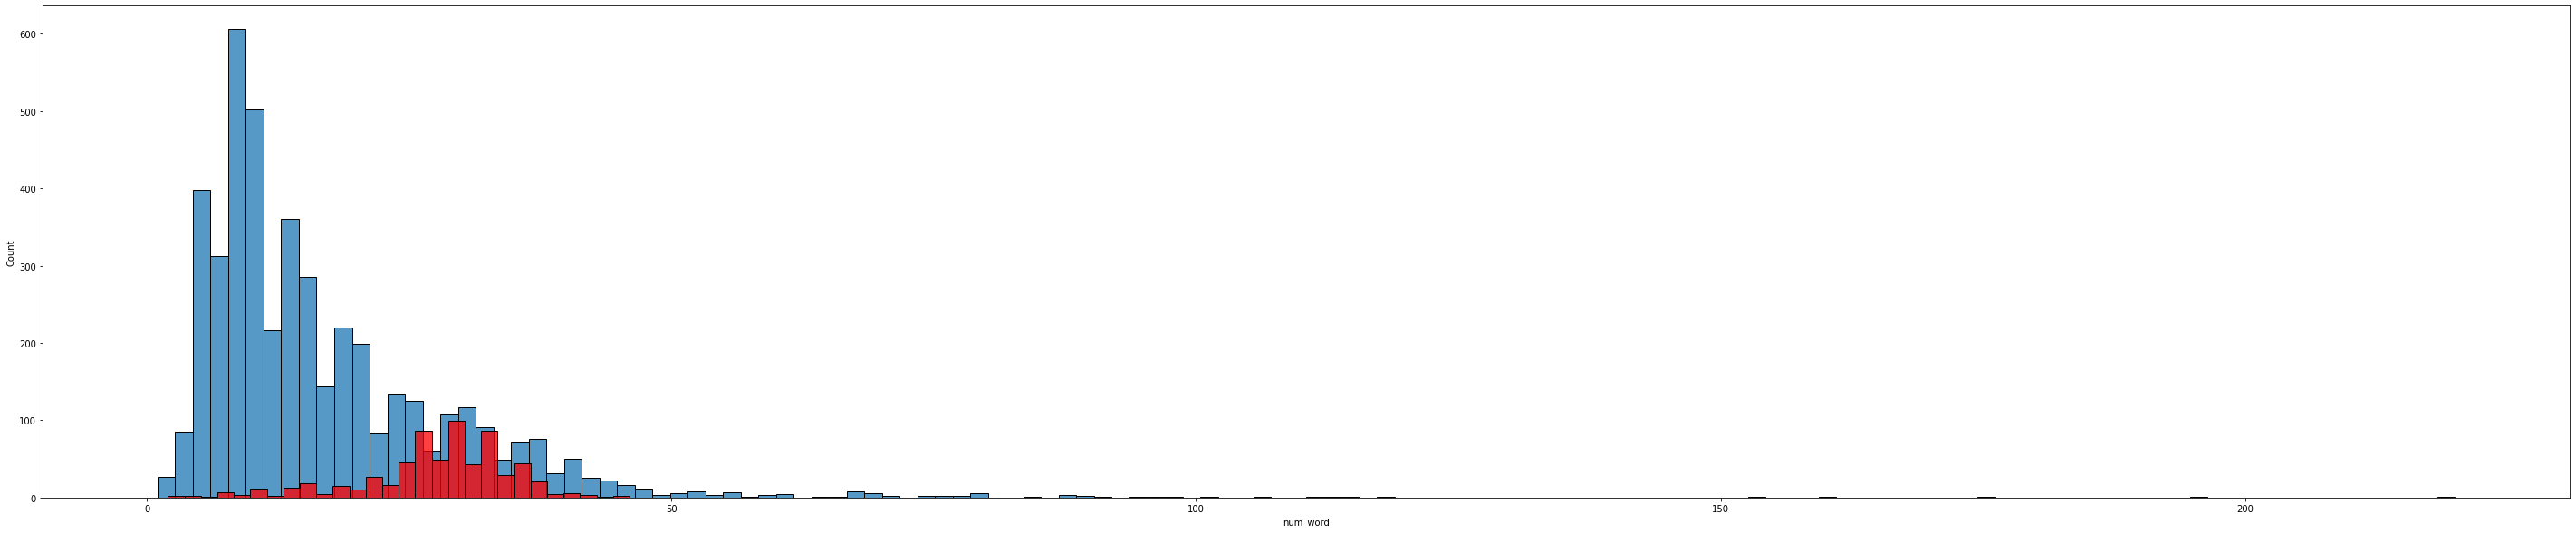

In [75]:
plt.figure(figsize=(50,10))
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')


<AxesSubplot:xlabel='num_sent', ylabel='Count'>

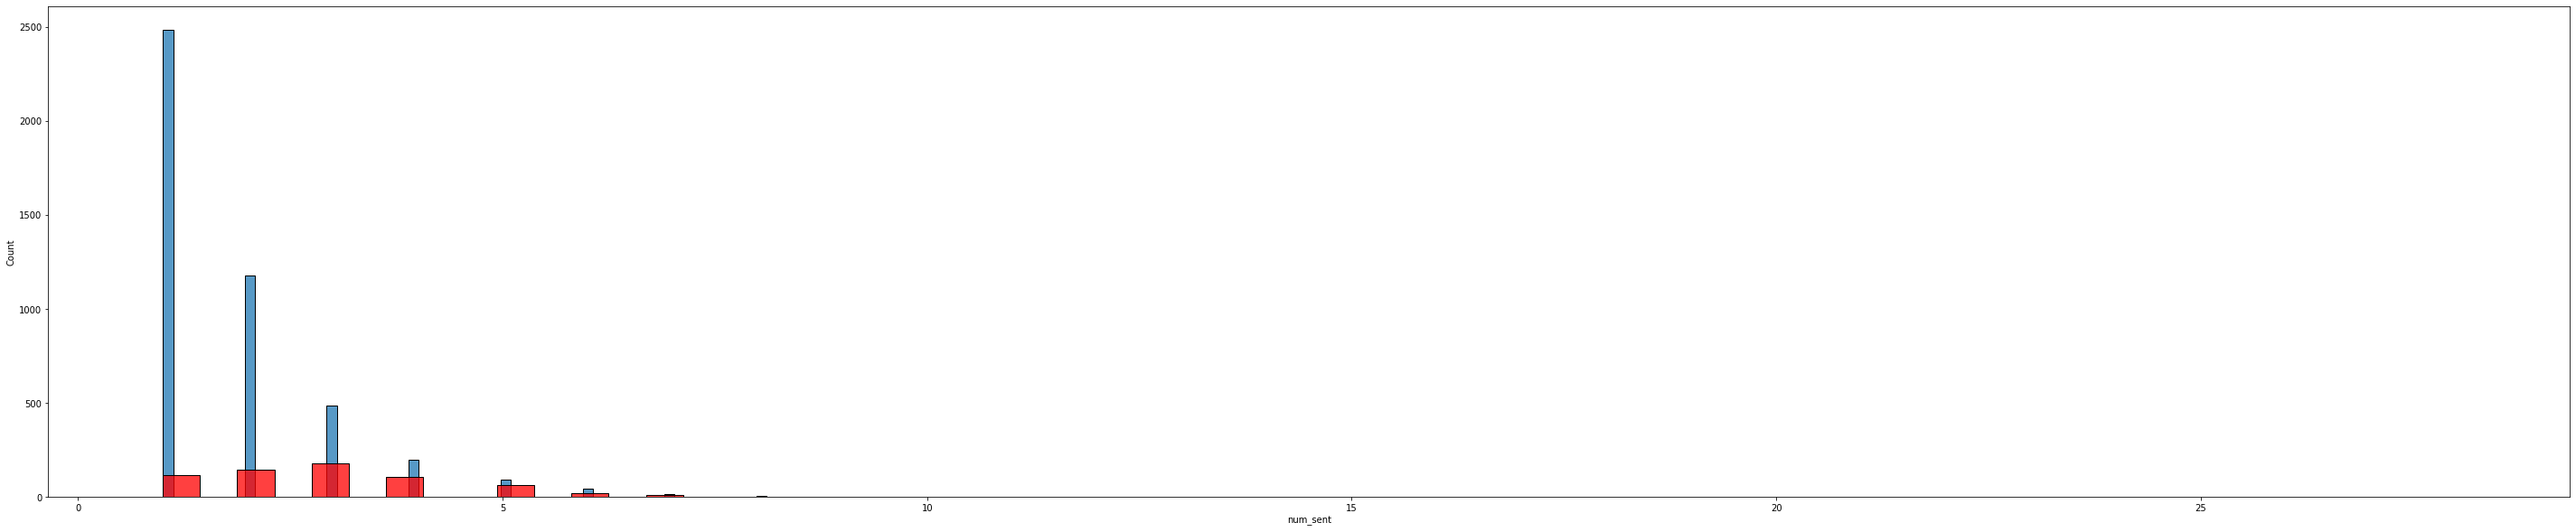

In [78]:
plt.figure(figsize=(50,10))
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')


<Figure size 2160x720 with 0 Axes>

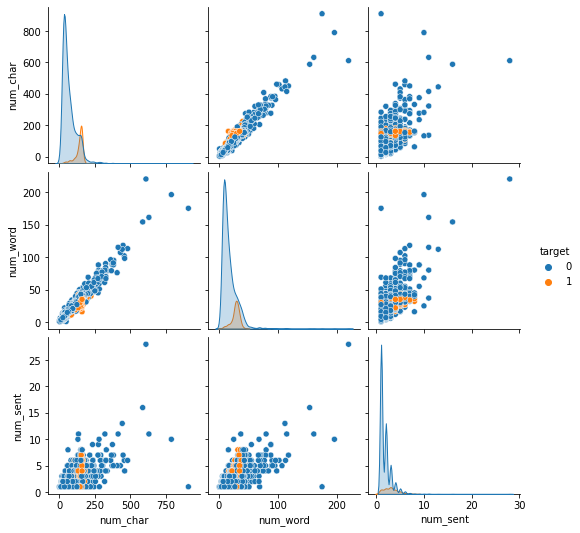

In [83]:
plt.figure(figsize=(30,10))
sns.pairplot(df,hue='target')

<AxesSubplot:>

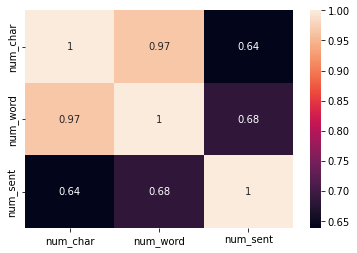

In [85]:
sns.heatmap(df.corr(),annot=True)

In [86]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# 3. Data Preprocessing 
* Lower case 
* tokenization
* remove special characters
* remove stop words 
* stemming

In [100]:
from nltk.corpus import stopwords

In [101]:
import string

In [106]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

> **testing stemmimg**

In [107]:
ps.stem('sleeping')

'sleep'

In [108]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

> **testing the code**

In [109]:
transform_text('%% i am good madhvendra sleeping eating ?')

'good madhvendra sleep eat'

# transforming the text

In [111]:
df['trans_text']=df['text'].apply(transform_text)

In [112]:
df.head(10)

,target,text,num_char,num_word,num_sent,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


## we use target trans_text

# Now generating the word cloud

In [124]:
from wordcloud import WordCloud
wc= WordCloud(width=2000,height=2000,min_font_size=10,background_color='black')

In [125]:
spam_wc= wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

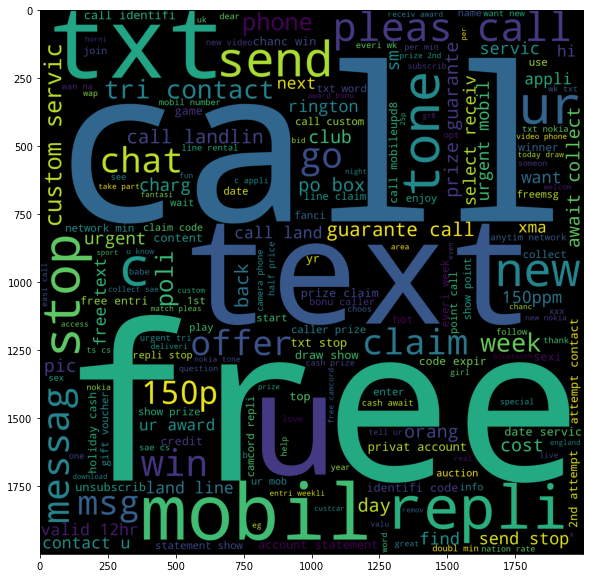

In [130]:
plt.figure(figsize=(30,10))
plt.imshow(spam_wc)


In [131]:
ham_wc= wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))

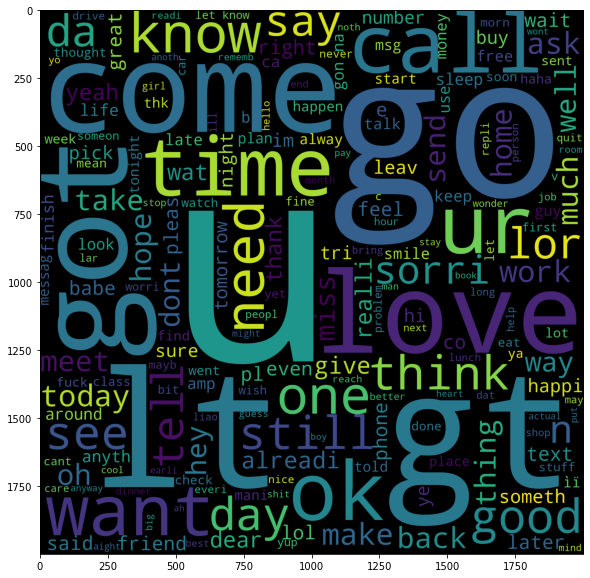

In [132]:
plt.figure(figsize=(30,10))
plt.imshow(ham_wc)

# Accessing top 50 most used words

In [134]:
spam_corpus=[]
for i in df[df['target']== 1]['trans_text'].tolist():
    for j in i.split():
        spam_corpus.append(j)

In [135]:
len(spam_corpus)

9939

In [136]:
from collections import Counter

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


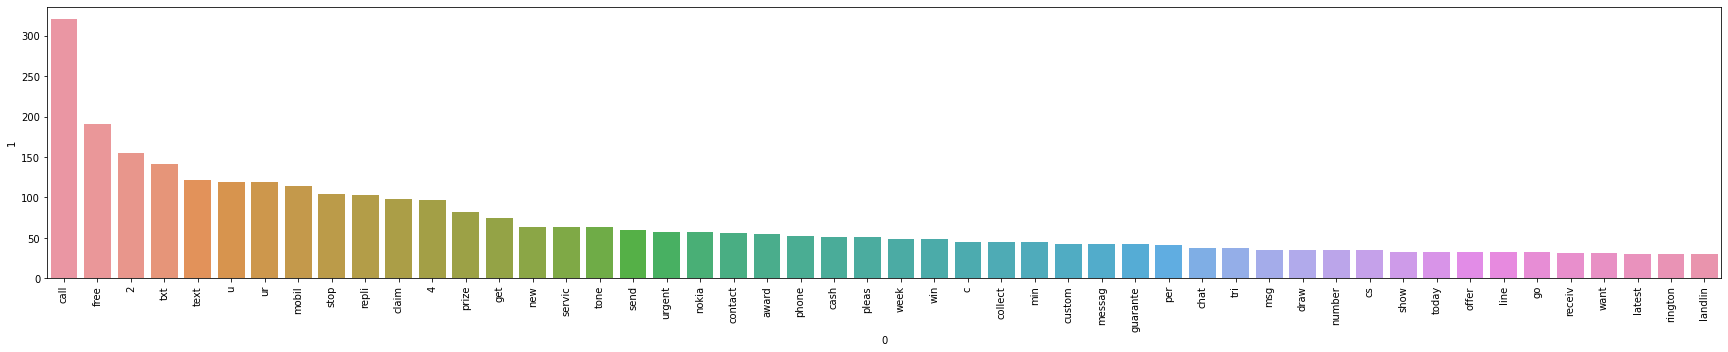

In [143]:
plt.figure(figsize=(30,5))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [146]:
ham_corpus=[]
for i in df[df['target']== 0]['trans_text'].tolist():
    for j in i.split():
        ham_corpus.append(j)

In [147]:
len(ham_corpus)

35394

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


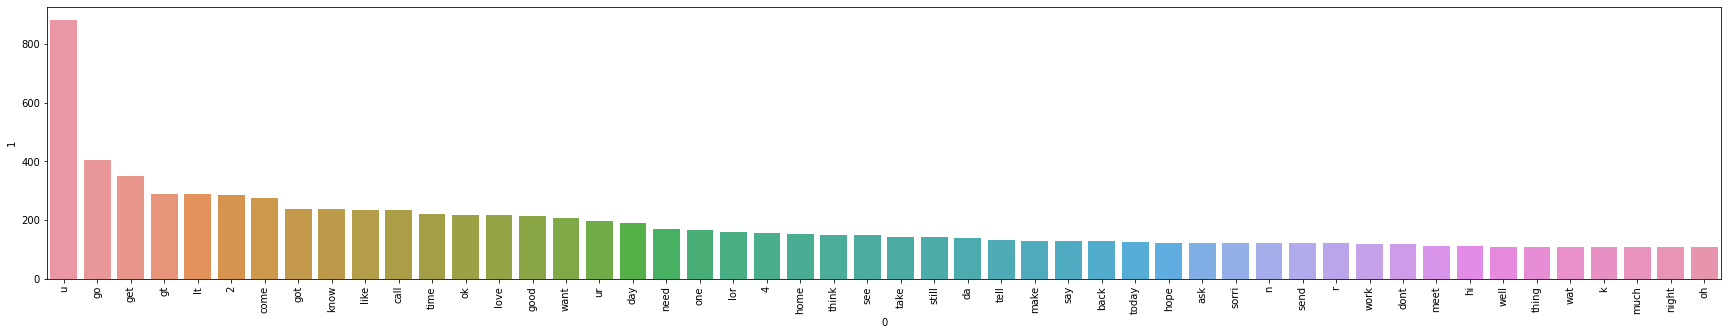

In [148]:
plt.figure(figsize=(30,5))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0],pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Building model by naive bayes

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [151]:
x = cv.fit_transform(df['trans_text']).toarray()

In [152]:
x.shape

(5169, 6708)

In [154]:
y = df['target'].values

In [163]:
y.shape

(5169,)

In [174]:
y=y.astype('int')

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## train test split

In [177]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [178]:
y_train.astype

<function ndarray.astype>

In [179]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [180]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [181]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [184]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [185]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [186]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


# got nice accuracy